# **Analise e Aprimoramentos em uma Base de Dados sobre Funcionários de uma Empresa**


Vamos analisar os dados de funcionários de uma empresa multinacional não especificada, limpá-la e tirar insights relevantes \
Execute a célula abaixo para instalar a base de dados em `.xlsx`

## 1 - Instalação da Base de Dados

In [ ]:
!pip install wget

In [18]:
import wget
# URL do arquivo Excel no GitHub
url = 'https://github.com/VictorCamolese/EBAC-DataAnalyticsProjects/raw/main/employee_project/employee_sample_data.xlsx'

arquivo = 'employee_sample_data.xlsx'

# Baixar o arquivo usando wget
wget.download(url, arquivo)


'employee_sample_data.xlsx'

## 2 - Primeiras impressões da Base de Dados

In [19]:
import pandas as pd
import numpy as np

data = pd.read_excel('employee_sample_data.xlsx')
data.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,NaT
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,2006-10-26,163099,0.20,United States,Chicago,NaT
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,2019-09-27,84913,0.07,United States,Chicago,NaT
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,1995-11-20,95409,0.00,United States,Phoenix,NaT


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   EEID           1000 non-null   object        
 1   Full Name      1000 non-null   object        
 2   Job Title      1000 non-null   object        
 3   Department     1000 non-null   object        
 4   Business Unit  1000 non-null   object        
 5   Gender         1000 non-null   object        
 6   Ethnicity      1000 non-null   object        
 7   Age            1000 non-null   int64         
 8   Hire Date      1000 non-null   datetime64[ns]
 9   Annual Salary  1000 non-null   int64         
 10  Bonus %        1000 non-null   float64       
 11  Country        1000 non-null   object        
 12  City           1000 non-null   object        
 13  Exit Date      85 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(9)
memory usage: 109.5

In [21]:
# verificando os indices de Job Titles para limparmos erros gramaticais
list(set(data['Job Title']))

['Solutions Architect',
 'HRIS Analyst',
 'Sr. Business Partner',
 'Controls Engineer',
 'Cloud Infrastructure Architect',
 'Analyst',
 'Enterprise Architect',
 'Sr. Analyst',
 'Test Engineer',
 'Vice President',
 'Network Engineer',
 'Account Representative',
 'Network Administrator',
 'Business Partner',
 'Analyst II',
 'Automation Engineer',
 'Development Engineer',
 'Systems Analyst',
 'Network Architect',
 'Field Engineer',
 'Director',
 'IT Systems Architect',
 'Operations Engineer',
 'Engineering Manager',
 'Computer Systems Manager',
 'Quality Engineer',
 'Service Desk Analyst',
 'IT Coordinator',
 'Manager',
 'System Administrator\xa0',
 'Sr. Account Representative',
 'Sr. Manger',
 'Technical Architect']

In [22]:
data['Job Title'] = data['Job Title'].apply(lambda x: 'Sr. Manager' if x == 'Sr. Manger' else x)
data['Job Title'] = data['Job Title'].apply(lambda x: 'System Administrator' if x == 'System Administrator\xa0' else x)
data.head(5)

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manager,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,NaT
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,2006-10-26,163099,0.20,United States,Chicago,NaT
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,2019-09-27,84913,0.07,United States,Chicago,NaT
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,1995-11-20,95409,0.00,United States,Phoenix,NaT


---

## 3 - Analisando informações preliminares

Vamos verificar as informações dos funcionários demitidos. \
Vejamos os cargos em que mais inidem demissões:

In [144]:
# criando um novo df filtrando somente pelos indices nao nulos em Exit Date
data_fired_emp = data[data['Exit Date'].isnull()==False]
# limpando colunas indesejadas
data_fired_emp = data_fired_emp.drop(columns = ['Full Name','City','Hire Date','Exit Date'])
# ordenando a apresentacao por cargo e departamento
data_fired_emp.sort_values(by=['Job Title','Department']).head()

,EEID,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Annual Salary,Bonus %,Country
675,E03170,Account Representative,Sales,Manufacturing,Female,Asian,63,72340,0.0,United States
778,E00749,Account Representative,Sales,Manufacturing,Female,Asian,37,64204,0.0,United States
905,E03863,Account Representative,Sales,Research & Development,Female,Black,40,62411,0.0,United States
7,E04332,Analyst,Finance,Manufacturing,Male,Black,25,41336,0.0,United States
996,E01909,Analyst,Finance,Speciality Products,Female,Asian,44,47387,0.0,China


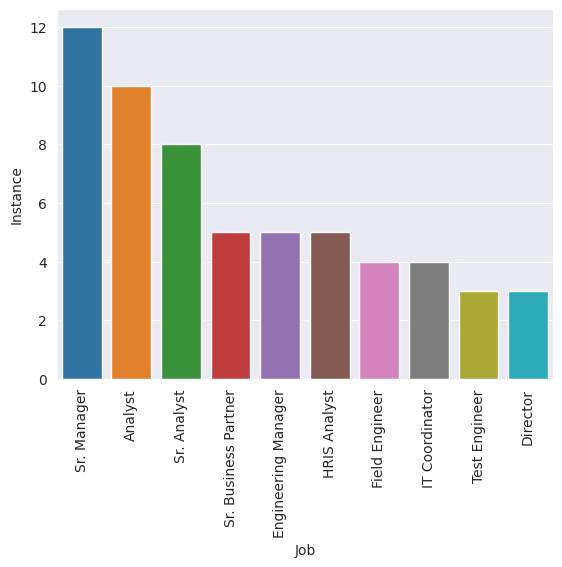

In [145]:
# criando o data frame que conta o numero de demissoes por cargo
job_counts_df = pd.DataFrame(columns= ['Job', 'Instance'])
job_counts_df['Job'] = data_fired_emp['Job Title'].drop_duplicates()
job_counts_df['Instance'] = data_fired_emp['Job Title'].value_counts().values
# limitando ate 10 indices no df
job_counts_df = job_counts_df[0:10]

# criando o grafico
with sns.axes_style('darkgrid'):
  grafic = sns.barplot(job_counts_df, x='Job',y='Instance')
  grafic.set_xticklabels(grafic.get_xticklabels(), rotation=90)